In [50]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Input, Dropout
from keras.utils import to_categorical
from keras import initializers
# for combining all the hyper-parameters
import itertools

# Data Preprocessing 

In [51]:
#Extracting the training and test sets
train_df = pd.read_csv('../data/monks-2-train.csv').to_numpy()
test_df = pd.read_csv('../data/monks-2-test.csv').to_numpy()

#Preparing train_df for training
train_dataset = train_df[:, 1:7]
train_labelset = train_df[:, 0]
#Preparing test_df for testing
test_dataset = test_df[:, 1:7]
test_labelset = test_df[:, 0]

# One hot encoding 

In [52]:
# one hot encoding 
def fix_zero(dataset):
  return dataset - 1

def to_one_hot_encoding(dataset):
    fixed_dataset = fix_zero(dataset)
    one_hot_dataset = []
    for column in fixed_dataset.T:
        one_hot_column = to_categorical(column)
        for column_index in range(one_hot_column.shape[1]):
            one_hot_dataset.append(one_hot_column[:,column_index])
    return np.asarray(one_hot_dataset).T

one_hot_train = to_one_hot_encoding(train_dataset)
one_hot_test  = to_one_hot_encoding(test_dataset)
one_hot_train.shape , train_labelset.shape
one_hot_test.shape , test_labelset.shape

((431, 17), (431,))

#GrideSearch after  Screening Pathe

In [58]:
# define the grid search parameters
param_grid_1 = {}
param_grid_1['lr'] = [0.1, 0.4, 0.7]
param_grid_1['momentum'] = [0.1, 0.4, 0.7]
param_grid_1['num_hidden_units'] = [2,3,4]
param_grid_1['num_hidden_units2'] = [2,3,4]
param_grid_1['activation_hidden'] = ['relu', 'sigmoid', 'softmax', 'tanh']
param_grid_1['activation_hidden2'] = ['relu', 'sigmoid', 'softmax', 'tanh']
param_grid_1['activation_out'] = ['softmax', 'tanh','sigmoid']
param_grid_1['epochs'] = [120] 
param_grid_1['batch_size'] = [10] 

GrideSearch Result

Total Running Time: %f 8546.459070205688
Best: 1.000000 using {'activation_hidden': 'relu', 'activation_hidden2': 'relu', 'activation_out': 'sigmoid', 'batch_size': 10, 'epochs': 120, 'lr': 0.1, 'momentum': 0.1, 'num_hidden_units': 3, 'num_hidden_units2': 3}

In [54]:
model = Sequential()
initializer = initializers.GlorotNormal(seed = 1) # seed to produce the same random sample.
model.add(Dense(units=3, kernel_initializer=initializer, input_dim=17, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr= 0.1, momentum=0.1, nesterov=False)
model.compile(optimizer=sgd, loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(one_hot_train, train_labelset,validation_data=(one_hot_test, test_labelset), epochs= 120, batch_size=10, verbose=1)

Epoch 1/120
17/17 [==============================] - 0s 9ms/step - loss: 0.2355 - accuracy: 0.6131 - val_loss: 0.2277 - val_accuracy: 0.6705
Epoch 2/120
17/17 [==============================] - 0s 4ms/step - loss: 0.2337 - accuracy: 0.6190 - val_loss: 0.2257 - val_accuracy: 0.6705
Epoch 3/120
17/17 [==============================] - 0s 14ms/step - loss: 0.2318 - accuracy: 0.6190 - val_loss: 0.2247 - val_accuracy: 0.6705
Epoch 4/120
17/17 [==============================] - 0s 4ms/step - loss: 0.2287 - accuracy: 0.6190 - val_loss: 0.2237 - val_accuracy: 0.6705
Epoch 5/120
17/17 [==============================] - 0s 4ms/step - loss: 0.2269 - accuracy: 0.6190 - val_loss: 0.2220 - val_accuracy: 0.6705
Epoch 6/120
17/17 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.6190 - val_loss: 0.2203 - val_accuracy: 0.6705
Epoch 7/120
17/17 [==============================] - 0s 4ms/step - loss: 0.2211 - accuracy: 0.6190 - val_loss: 0.2180 - val_accuracy: 0.6705
Epoch 8/120


Epoch 59/120
17/17 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 60/120
17/17 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 61/120
17/17 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 62/120
17/17 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 63/120
17/17 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 64/120
17/17 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 65/120
17/17 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 

17/17 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 117/120
17/17 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 118/120
17/17 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 119/120
17/17 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 120/120
17/17 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000


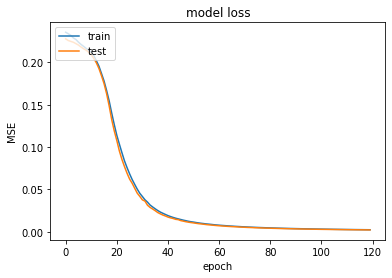

In [59]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('monk-2-learning curve')
plt.show()